EDA and bias detection using visualization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [4]:
# Load cleaned dataset
file_path = r"..\data\cleaned_dataset.csv"
df = pd.read_csv(file_path)

In [5]:
# 1. Summary statistics
print("Summary of employment:")
print(df['Employment'].value_counts())
print("\nGender distribution:")
print(df['Gender'].value_counts())
print("\nAge distribution:")
print(df['Age'].value_counts())

Summary of employment:
Employment
1    64874
0     8588
Name: count, dtype: int64

Gender distribution:
Gender
Man          68573
Woman         3518
NonBinary     1371
Name: count, dtype: int64

Age distribution:
Age
<35    47819
>35    25643
Name: count, dtype: int64


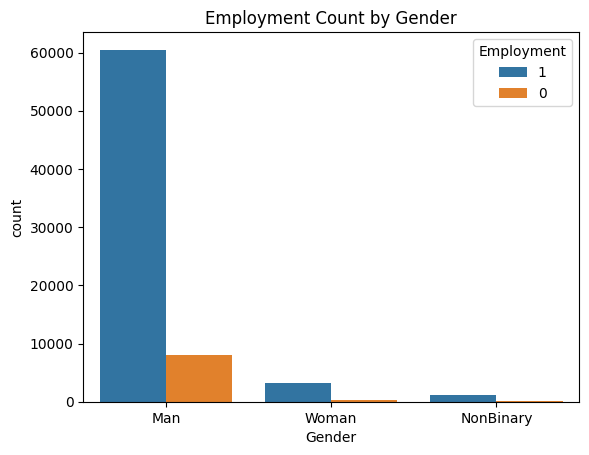

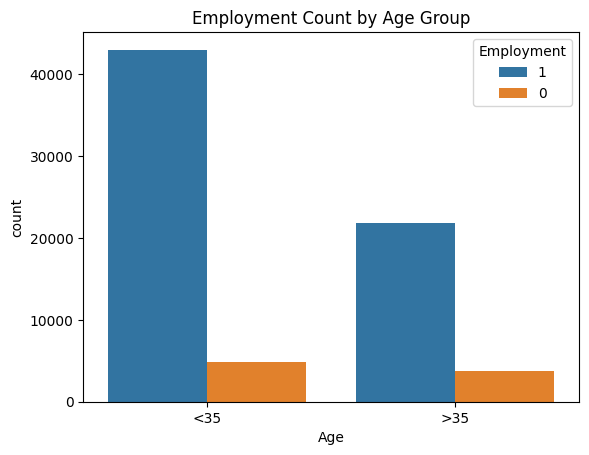

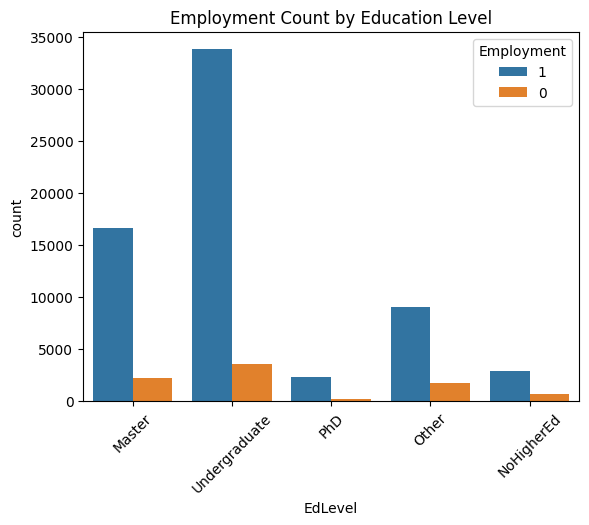

In [7]:
# 2. Bar plots
df['Employment'] = df['Employment'].astype(str)
sns.countplot(data=df, x='Gender', hue='Employment')
plt.title('Employment Count by Gender')
plt.show()

df['Employment'] = df['Employment'].astype(str)
sns.countplot(data=df, x='Age', hue='Employment')
plt.title('Employment Count by Age Group')
plt.show()

df['Employment'] = df['Employment'].astype(str)
sns.countplot(data=df, x='EdLevel', hue='Employment')
plt.title('Employment Count by Education Level')
plt.xticks(rotation=45)
plt.show()

In [8]:

# 3. Chi-square tests
print("\nChi-Square Test: Employment vs Gender")
contingency_gender = pd.crosstab(df['Gender'], df['Employment'])
chi2, p, _, _ = chi2_contingency(contingency_gender)
print("Chi2 =", chi2, "p =", p)

print("\nChi-Square Test: Employment vs Age")
contingency_age = pd.crosstab(df['Age'], df['Employment'])
chi2, p, _, _ = chi2_contingency(contingency_age)
print("Chi2 =", chi2, "p =", p)

print("\nChi-Square Test: Employment vs Education Level")
contingency_edu = pd.crosstab(df['EdLevel'], df['Employment'])
chi2, p, _, _ = chi2_contingency(contingency_edu)
print("Chi2 =", chi2, "p =", p)


Chi-Square Test: Employment vs Gender
Chi2 = 24.71015401746286 p = 4.307826778538574e-06

Chi-Square Test: Employment vs Age
Chi2 = 364.6768751980847 p = 2.699142506253583e-81

Chi-Square Test: Employment vs Education Level
Chi2 = 626.6442758364013 p = 2.6503267120199444e-134


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


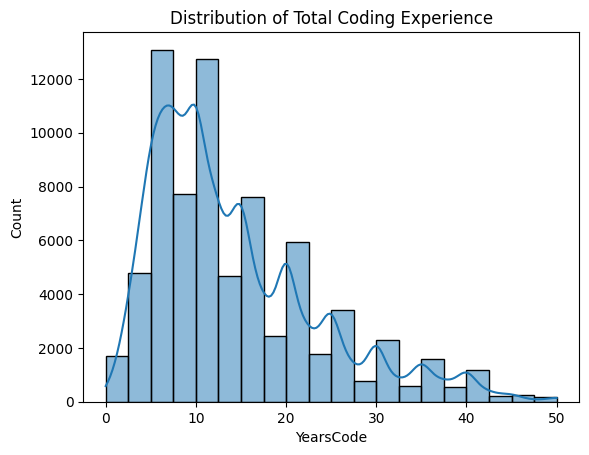

c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


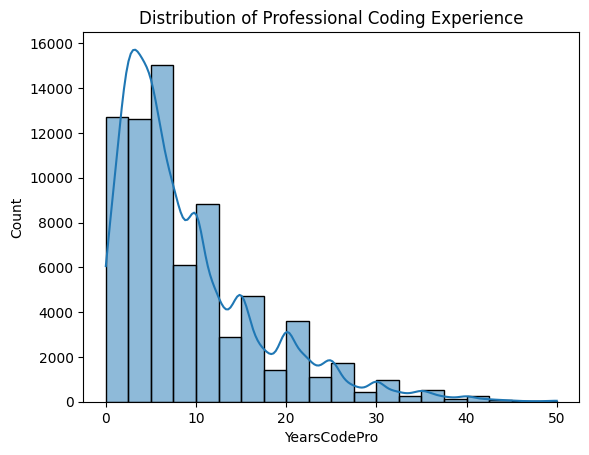

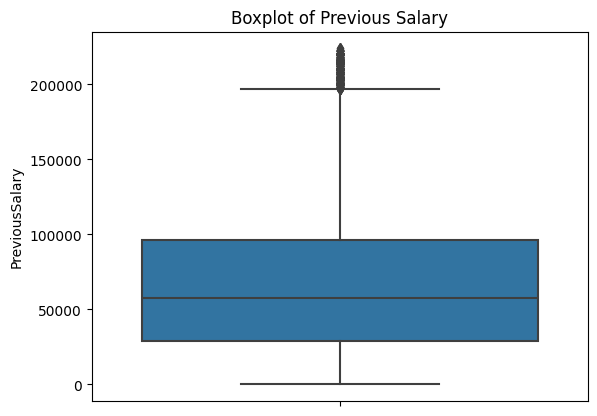

c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


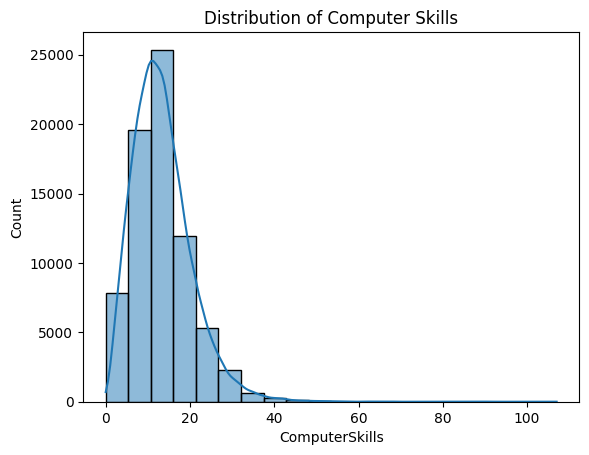

In [9]:
# Univariate Distributions
sns.histplot(df['YearsCode'], bins=20, kde=True)
plt.title('Distribution of Total Coding Experience')
plt.show()

sns.histplot(df['YearsCodePro'], bins=20, kde=True)
plt.title('Distribution of Professional Coding Experience')
plt.show()

sns.boxplot(data=df, y='PreviousSalary')
plt.title('Boxplot of Previous Salary')
plt.show()

sns.histplot(df['ComputerSkills'], bins=20, kde=True)
plt.title('Distribution of Computer Skills')
plt.show()

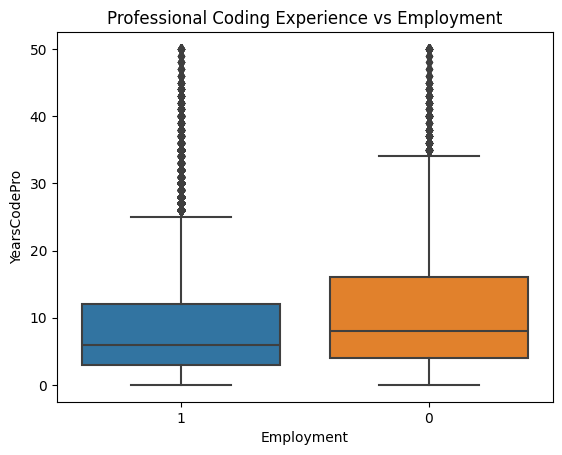

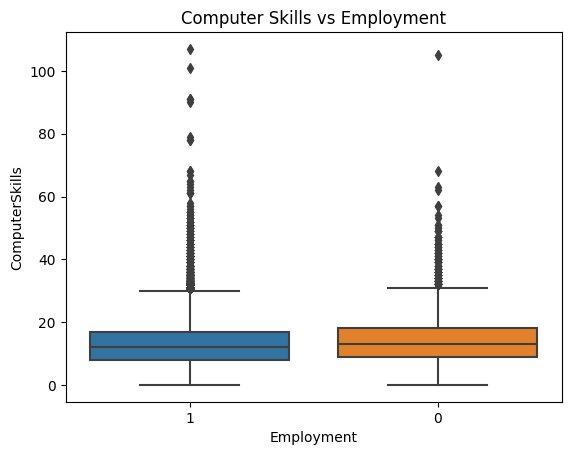

In [10]:
# Bivariate Analysis
sns.boxplot(data=df, x='Employment', y='YearsCodePro')
plt.title('Professional Coding Experience vs Employment')
plt.show()

sns.boxplot(data=df, x='Employment', y='ComputerSkills')
plt.title('Computer Skills vs Employment')
plt.show()

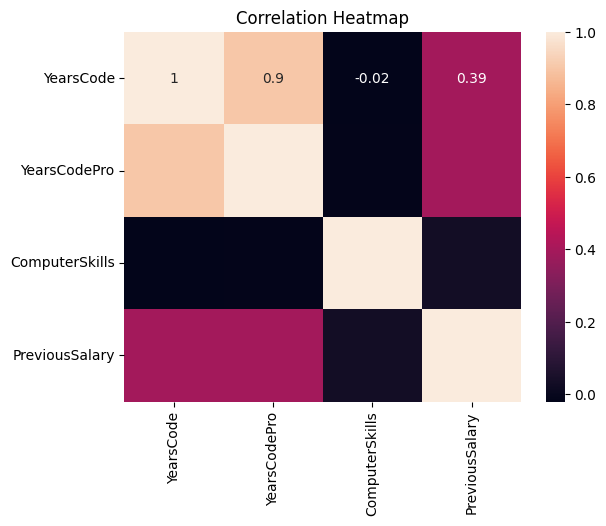

In [11]:
# Correlation Heatmap
sns.heatmap(df[['YearsCode', 'YearsCodePro', 'ComputerSkills', 'PreviousSalary']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

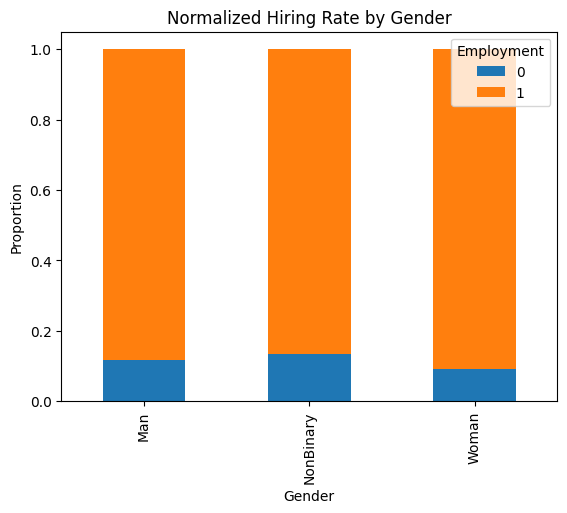

In [12]:
# Normalized Hiring Rates
(df.groupby('Gender')['Employment']
   .value_counts(normalize=True)
   .unstack()
   .plot(kind='bar', stacked=True))
plt.title('Normalized Hiring Rate by Gender')
plt.ylabel('Proportion')
plt.show()
